In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/exploded-serves.csv')

print(df.shape)

df = df[df['Direction'] != 'Fault']

(91073, 32)


In [3]:
X = df.reset_index(drop=True).drop(columns=['Direction', 'Unnamed: 0'])
y = df['Direction']

print(X.columns)

le = LabelEncoder()
encoded_y = le.fit_transform(y)

categorical_columns = ['Surface', 'FullNameServer', 'previous_directions0', 'previous_directions1', 'previous_directions2', 'previous_directions3', 'previous_directions4', 'PointsServer', 'PointsReturner']
X[categorical_columns] = X[categorical_columns].apply(lambda x: x.astype('category'))
X['HandReturner'] = X['HandReturner'].astype('bool')

Index(['Surface', 'FullNameServer', 'PointsServer', 'PointsReturner',
       'GamesServer', 'GamesReturner', 'SetsServer', 'SetsReturner',
       'HandReturner', 'IsFirstServe', 'previous_directions0',
       'previous_directions1', 'previous_directions2', 'previous_directions3',
       'previous_directions4', 'previous_point_server_wins0',
       'previous_point_server_wins1', 'previous_point_server_wins2',
       'previous_point_server_wins3', 'previous_point_server_wins4',
       'previous_rally_length0', 'previous_rally_length1',
       'previous_rally_length2', 'previous_rally_length3',
       'previous_rally_length4', 'previous_serve_is_first0',
       'previous_serve_is_first1', 'previous_serve_is_first2',
       'previous_serve_is_first3', 'previous_serve_is_first4'],
      dtype='object')


In [4]:
print(X.shape)

(65644, 30)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2)

clf = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
clf.fit(X_train, y_train)

clf.save_model("categorical-model.json")

y_pred = clf.predict(X_test)

In [6]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 48.74%


In [7]:
# evaluate predictions
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 64.30%


                                   score
IsFirstServe                 8706.392578
FullNameServer               6786.269043
PointsServer                 3493.947266
PointsReturner               3362.094238
previous_rally_length0       1292.752075
previous_rally_length3       1253.808472
previous_rally_length1       1248.505371
previous_rally_length2       1215.687500
previous_rally_length4       1192.858032
previous_directions3         1185.434448
Surface                      1137.499634
previous_directions2         1092.488403
previous_directions4         1004.069031
previous_directions1          917.472351
previous_directions0          915.559021
GamesReturner                 908.785339
GamesServer                   822.861145
SetsServer                    481.026581
SetsReturner                  457.773834
previous_point_server_wins2   240.720596
previous_point_server_wins1   238.414886
previous_point_server_wins3   232.164764
previous_point_server_wins4   219.988052
previous_point_s

<Axes: >

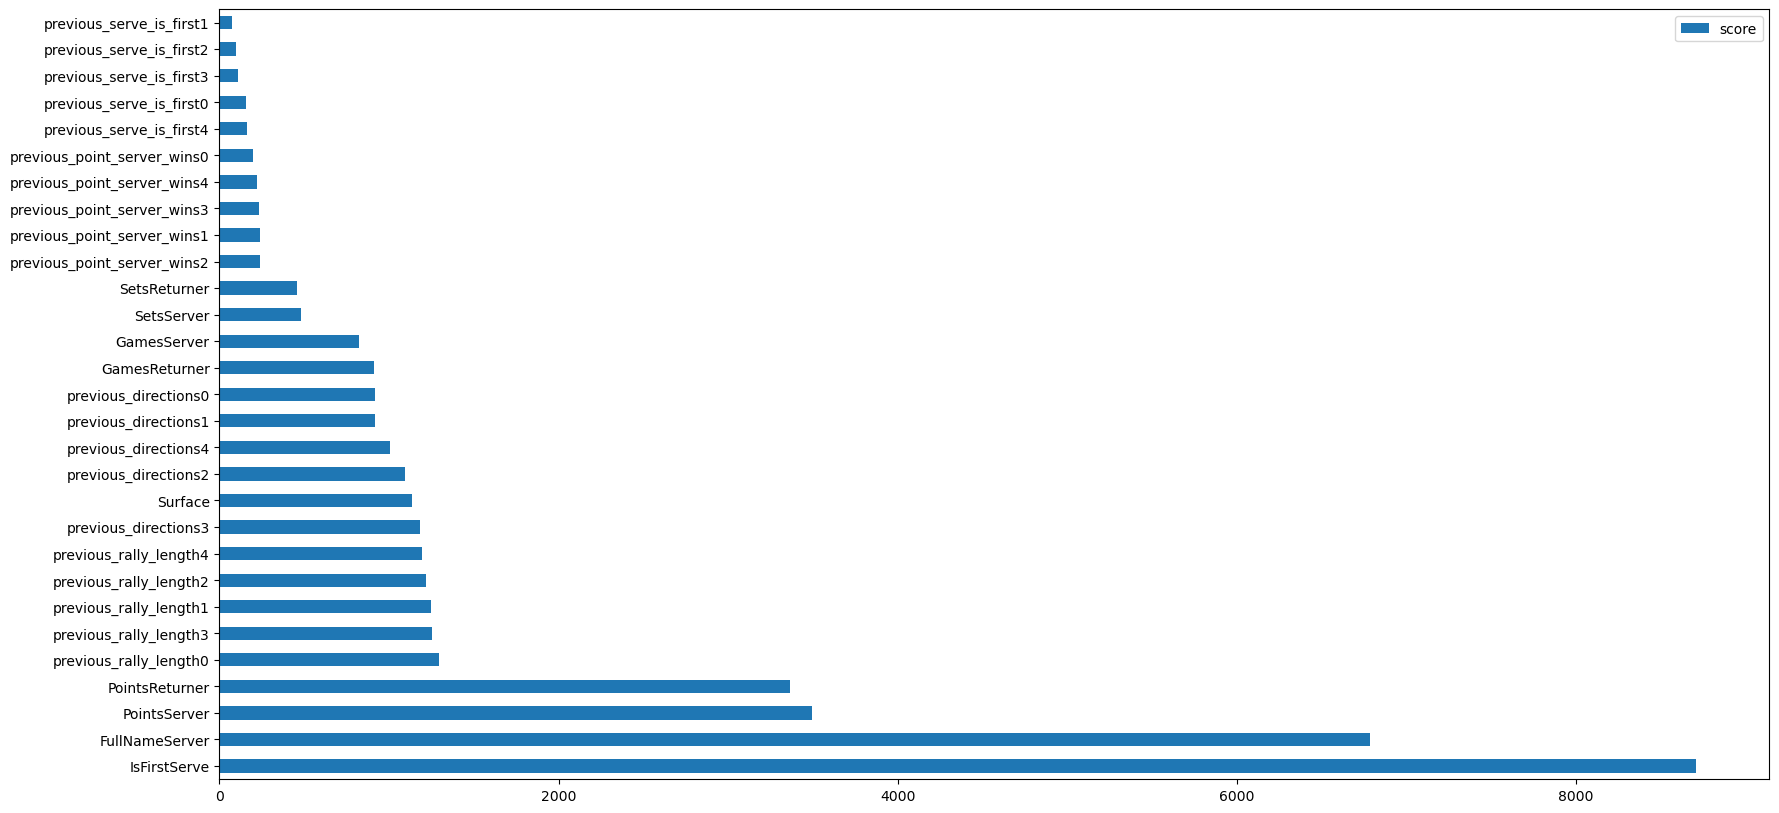

In [8]:
feature_important = clf.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
print(data)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features